In [26]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,MaxPooling2D,Activation,Dropout,BatchNormalization,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical


In [27]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset=train.flow_from_directory(directory='E:/ML-Project/seg_train' ,target_size=(50,50),shuffle=True)
test_dataset=train.flow_from_directory(directory='E:/ML-Project/seg_test' ,target_size=(50,50),shuffle=True)


Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


[5, 5, 6, 25, 22, 28, 24, 22, 8, 22]


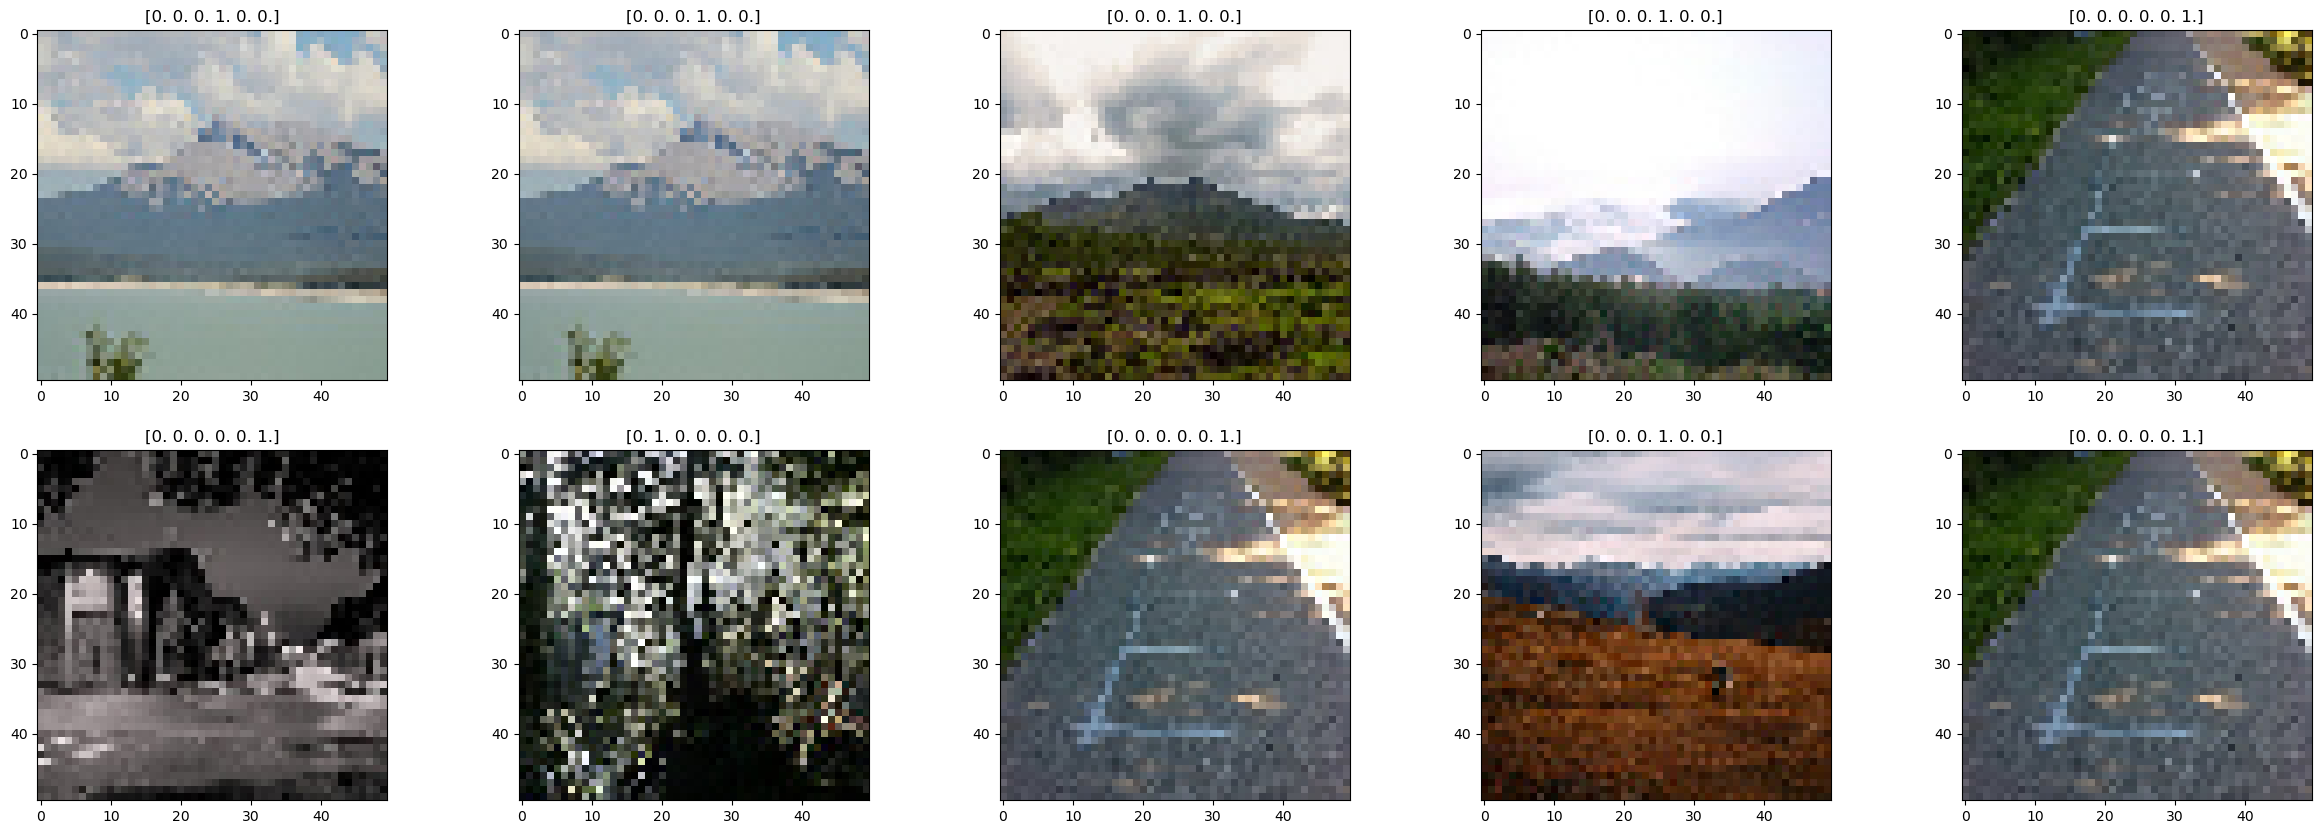

In [18]:
indices=[np.random.randint(32) for i in range(10)]
print(indices)

plt.figure(figsize=(20,8))
for i in enumerate(indices):
	plt.subplot(2,5,i[0]+1)
	plt.imshow(train_dataset[0][0][i[1]])
	plt.title(train_dataset[0][1][i[1]])
plt.show()

In [32]:
values=list(train_dataset.class_indices.values())
keys=list(train_dataset.class_indices.keys())

dics=list(map(lambda x,y:{x:y},values,keys))

from functools import reduce
mappings=reduce(lambda x,y:{**x,**y},dics)
mappings
# print(values)
# print(keys)
# print(dics)

{0: 'buildings',
 1: 'forest',
 2: 'glacier',
 3: 'mountain',
 4: 'sea',
 5: 'street'}

In [67]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',input_shape=(50,50,3)))
model.add(Activation('relu'))
model.add(Conv2D(filters=32,kernel_size=(3,3)))
model.add(Dropout(0.25))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters=50,kernel_size=(3,3),padding='same',input_shape=(50,50,3)))
model.add(Activation('relu'))
model.add(Conv2D(filters=50,kernel_size=(3,3)))
model.add(Dropout(0.25))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters=75,kernel_size=(3,3),padding='same',input_shape=(50,50,3)))
model.add(Activation('relu'))
model.add(Conv2D(filters=75,kernel_size=(3,2)))
model.add(Dropout(0.25))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
kernel_regularizer=keras.regularizers.l1_l2(l1=1e-5,l2=1e-4)
model.add(Dense(units=50,activation='relu',kernel_regularizer=kernel_regularizer))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(6,activation='softmax'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 50, 50, 32)        896       
                                                                 
 activation_42 (Activation)  (None, 50, 50, 32)        0         
                                                                 
 conv2d_43 (Conv2D)          (None, 48, 48, 32)        9248      
                                                                 
 dropout_23 (Dropout)        (None, 48, 48, 32)        0         
                                                                 
 activation_43 (Activation)  (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                      

In [56]:
model.compile(loss="CategoricalCrossentropy",optimizer='adam',metrics='accuracy')
history=model.fit(train_dataset,batch_size=80,epochs=10,validation_data=test_dataset)

Epoch 1/10
439/439 [==============================] - 582s 1s/step - loss: 1.2527 - accuracy: 0.4955 - val_loss: 1.0791 - val_accuracy: 0.6087
Epoch 2/10
439/439 [==============================] - 239s 545ms/step - loss: 0.9308 - accuracy: 0.6403 - val_loss: 0.9106 - val_accuracy: 0.6787
Epoch 3/10
439/439 [==============================] - 243s 555ms/step - loss: 0.7931 - accuracy: 0.7127 - val_loss: 0.8408 - val_accuracy: 0.7107
Epoch 4/10
439/439 [==============================] - 231s 526ms/step - loss: 0.6608 - accuracy: 0.7701 - val_loss: 0.6835 - val_accuracy: 0.7647
Epoch 5/10
439/439 [==============================] - 193s 440ms/step - loss: 0.5850 - accuracy: 0.7976 - val_loss: 0.6504 - val_accuracy: 0.8087
Epoch 6/10
439/439 [==============================] - 183s 417ms/step - loss: 0.5420 - accuracy: 0.8173 - val_loss: 0.5762 - val_accuracy: 0.8033
Epoch 7/10
439/439 [==============================] - 389s 887ms/step - loss: 0.5099 - accuracy: 0.8259 - val_loss: 0.6293 - va

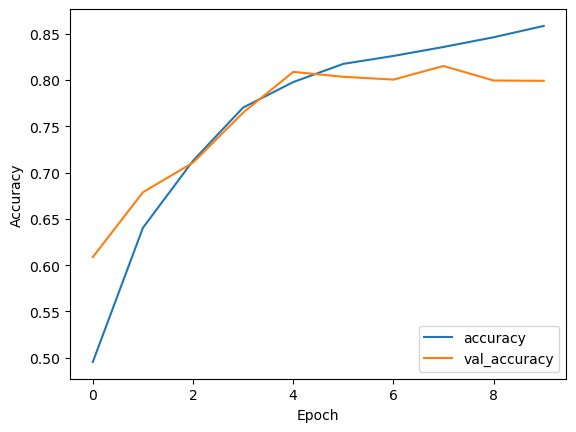

In [66]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')